**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Fall 2021; Prof. V. F. de Almeida

# Title
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\fluxc}{\boldsymbol{q}_\text{c}}
  \newcommand{\fluxf}{\boldsymbol{q}_\text{f}}
  \newcommand{\velocity}{\boldsymbol{v}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\xpoint}{\boldsymbol{x}}
  \newcommand{\Tc}{T_\text{c}}
  \newcommand{\wc}{w_\text{c}}
  \newcommand{\Tf}{T_\text{f}}
  \newcommand{\wf}{w_\text{f}}
  \newcommand{\wI}{w_\text{I}}
  \newcommand{\Ri}{R_\text{i}}
  \newcommand{\Ro}{R_\text{o}}
  \newcommand{\Omegac}{\Omega_\text{c}}
  \newcommand{\Omegaf}{\Omega_\text{f}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\div}{div}
  \DeclareMathOperator{\gradx}{grad_\xpoint}
  \DeclareMathOperator{\divx}{div_\xpoint}
  \DeclareMathOperator{\grad}{grad}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

**Student(s):**  `Andrew Hamel` and `Lohith Annadevula` <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentor and Collaborator:** `Valmor de Almeida`

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**10Dec2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Tests](#tests)
 + [Setup](#setup)
   - [Test 1](#1dsolofueldirichlet)
   - [Test 2](#3DomainsNeumannRobin)
   - [Test 3](#3DomainsNeumannNeumann)
   - [Moose Test 1](#Moose2Domain)
   - [Moose Test 2](#Moose3DomainNeumannRobin)
   - [Moose Test 3](#Moose3DomainNeumannNeumann)
* [2-D Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

`text goes here`

## [Problem Statement](#toc)<a id="problem"></a>

Solve the heat conduction problem 1/2 plate. Find $u:[a,b]\text{ } \mathbb{R} \rightarrow \mathbb{R}$ such that:

\begin{align*}
 -\bigl(-D(x)\, u'(x)\bigr)'(x) + S(x)u(x) + f(x)\, &= 0 \quad\quad \forall \quad\quad x\in [a,b], \\
 q_n(a) &= 0 | Neumann B.C., \\
 q_n(b) &= h(u-u_{\infty}) | Robin B.C.
\end{align*}
   
Given data: thermal conductivity coefficient, $D $, source, $S = 0$, $u_{ref}$ = 25 °C, h = 1.02 $\frac{W}{in^2 * K}$ and source bias $f$. 

## Neumann (left) / Robin (right) B.C. 

\begin{align*}
    A_{i,j} = (k \phi_i^\prime,\phi_j^\prime) - (S \phi_i, \phi_j) + h\phi_j(b)\phi_i(b) \\
    b_{i} = (f,\phi_i)  - q_{na}\phi_i(a) + hu_{ref}\phi_i(b)
\end{align*}


### Domain
`describe domain`

In [1]:
'''Domain'''


'Domain'

In [2]:
import numpy as np
import numpy as nm
import scipy.integrate as integrate
import scipy
import pandas as pd

from matplotlib import pyplot as plt
from engy_5310_Andrew import *

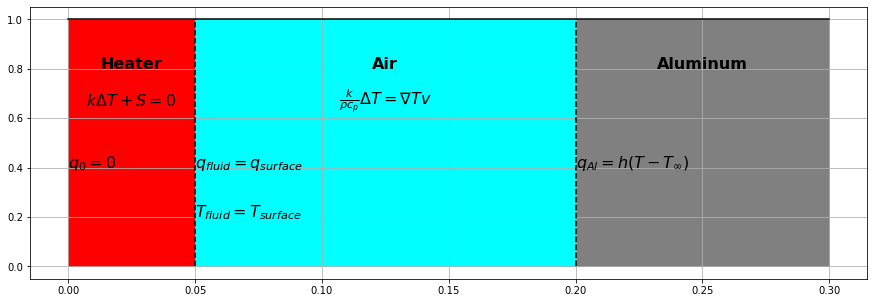

In [3]:
num_pts = 100

a = 0.0
b = 0.05
c = 0.20
d = c + 0.1

x = np.linspace(0,d,num_pts)
y = np.linspace(1,1,num_pts)

x_a = np.linspace(a,b,num_pts)
x_b = np.linspace(b,c,num_pts)
x_c = np.linspace(c,d,num_pts)
y0 = np.linspace(0,0,num_pts)


fig = plt.figure(figsize=(15,5))
plt.plot(x,y,"k-")
plt.plot([b,b],[0,1],"k--")
plt.plot([c,c],[0,1],"k--")

plt.grid()
#plt.ylim(0,d+0.1)

section = np.arange(a,b, 1/20.)
plt.fill_between(x_a,y,y0,color="red")
plt.fill_between(x_b,y,y0,color="cyan")
plt.fill_between(x_c,y,y0,color="gray")

#Domain Labels
plt.text((b-a)/2 + a ,0.8,"Heater",color="black",fontsize=16,weight="bold",horizontalalignment="center")
plt.text((c-b)/2 + b,0.8,"Air",color="black",fontsize=16,weight="bold",horizontalalignment="center")
plt.text((d-c)/2 + c,0.8,"Aluminum",color="black",fontsize=16,weight="bold",horizontalalignment="center")

#Heater B.C. and gov eqn
plt.text(a,0.4,"$q_{0} = 0$",color="black",fontsize=16)
plt.text((b-a)/2 + a,0.65,"$k\Delta T + S = 0$",color="black",fontsize=16,horizontalalignment="center")

#Air B.C. and gov eqn
plt.text((c-b)/2 + b,0.65,r"$\frac{k}{\rho c_p} \Delta T  = \nabla T v$",color="black",fontsize=16,horizontalalignment="center")
plt.text(b,0.4,"$q_{fluid} = q_{surface}$",color="black",fontsize=16)
plt.text(b,0.2,"$T_{fluid} = T_{surface}$",color="black",fontsize=16)

plt.text(c,0.4,"$q_{Al} = h(T-T_{\infty})$",color="black",fontsize=16)


#plt.arrow(.23,.6,-0.028,0.2,color="red",size=18)
plt.show()



## [Objectives](#toc)<a id="obj"></a>

`state objectives`

## [Approach](#toc)<a id="app"></a>

A Galerkin weak formulation follows below and the implementation of the integrands as MOOSE kernels are described next.

### [Weak Form of Problem Statement](#toc)<a id="weakform"></a> 


### [MOOSE Kernels](#toc)<a id="kernels"></a>


### [Tests](#toc)<a id="tests"></a>


### [Setup](#toc)<a id="setup"></a>

In [4]:
'''Domain'''


'Domain'

In [5]:
'''Parameters'''


'Parameters'

In [6]:
'''Data (boundary conditions for testing purposes)'''


'Data (boundary conditions for testing purposes)'

In [7]:
'''FEM Solution'''


'FEM Solution'

#### [Test 1](#toc)<a id="1dsolofueldirichlet"></a>


In [8]:
from scipy import constants as unit
unit.kelvin = 1.0
unit.second = 1.0
unit.joule = 1.0
unit.meter = 1.0
unit.watt = unit.joule/unit.second
unit.kg = unit.kilo*unit.gram
import numpy as np

In [9]:
k_plate = 6.096*unit.watt/unit.inch/unit.kelvin
k_coolant = 0.01524*unit.watt/unit.inch/unit.kelvin
rho_coolant = 0.0164*unit.kg/unit.inch**3
cp_coolant = 4168*unit.joule/unit.kg/unit.kelvin

s_source = 56.818*unit.watt/unit.inch**3

#x_i_l transfer
interfacial_heat_transfer_coeff = 1e15*unit.watt/unit.meter**2/unit.kelvin
interfacial_adsorption_coeff = 0

#x_i_r transfer
heat_transfer_coeff = 1000
temp_ref = unit.convert_temperature(25,'C','K')

velocity = np.zeros(3)
velocity[1] = 1*unit.milli*unit.meter/unit.second

In [10]:
'''Parameters'''
n_felem_plate = 10
n_felem_coolant = 10
n_felem_plate_2 = 10

In [11]:
'''FEM'''
n_plot_pts_plate = 10
n_plot_pts_coolant = 10
n_plot_pts_right_plate = 10

In [12]:
plt.style.use('classic')

x_a = 0.0*unit.inch
x_b = 0.20*unit.inch

#Degree of lagrange polynomials to be used
degree = 2

#Location where domain is split into subdomains
interface_loc = 0.05*unit.inch
locList = [interface_loc]

#Number of elements in each subdomain
numPartsList = [n_felem_plate,n_felem_coolant]

#Boundary condition types
bc_x_min = "neumann"
bc_x_max = "robin"

#Create whole domain partition
domain_partition = get_domain_partition(degree, locList,numPartsList, x_a, x_b,bc_x_min,bc_x_max)

kList = [k_plate,k_coolant]

#Heat Transfer Coefficient
h = heat_transfer_coeff     

#Boundary Conditions (neumann on left, robin on right)
x_min_flux = 0
x_max_u_ref = temp_ref  #deg C

#Create shape points that define the k, w, s, and f functions for the fem object
k_shape_pts = [(x_a,kList[0]),(interface_loc*0.9999999,kList[0]),(interface_loc,kList[1]),(x_b,kList[1])]
w_shape_pts =[(x_a,0),(x_b,0)]
s_shape_pts =[(x_a,0),(x_b,0)]
f_shape_pts = [(x_a,s_source),(interface_loc*0.9999999,s_source),(interface_loc,0), (x_b,0)]

#Create finite element object
femlb_1 = femLagrange(x_a,x_b,degree,1,f_shape_pts,k_shape_pts,s_shape_pts,w_shape_pts,domain_partition,0,0,0,0,bc_x_min,bc_x_max,h,x_min_flux,x_max_u_ref)

#Solve FEM problem
a_mtrx = assemble_a_mtrx_neumann_robin(femlb_1)

b_vec = assemble_b_vec_neumann_robin(femlb_1)

In [13]:
print("a_mtrx rank:",np.linalg.matrix_rank(a_mtrx))
print("a_mtrx shape:",a_mtrx.shape)
if np.linalg.matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print("A mtrx is full rank")
else:
    print("A mtrx is deficient")
    id_mtrx = np.identity(a_mtrx.shape[0])
    eps = 1e-5

    a_mtrx_fixed = (a_mtrx.transpose() @ a_mtrx) + (eps * id_mtrx)
    a_mtrx = a_mtrx_fixed
    print("A mtrx has been fixed")

a_mtrx rank: 41
a_mtrx shape: (41, 41)
A mtrx is full rank


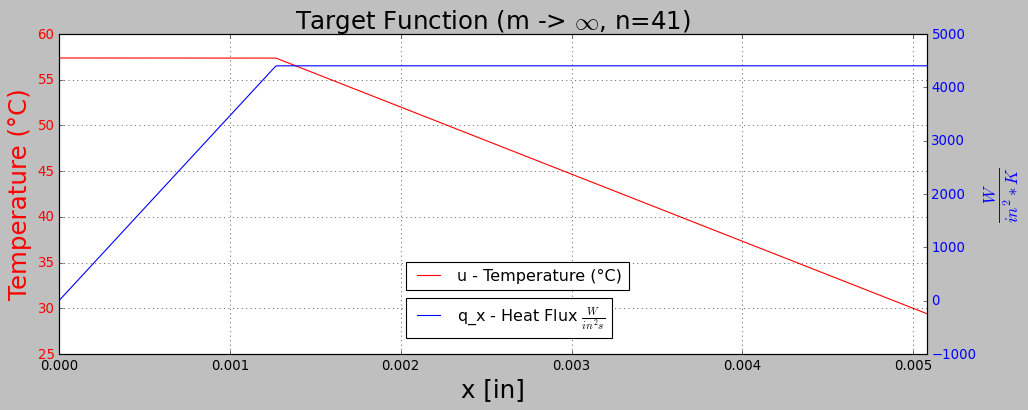

In [14]:
c_star_1 = np.linalg.solve(a_mtrx,b_vec)

n_pts = 500
x_pts = np.linspace(femlb_1.x_a, femlb_1.x_b, n_pts)
N = len(femlb_1.phi_list)

(fig, ax1) = plt.subplots(1, figsize=(14, 5))
ax2 = ax1.twinx()
ax1.plot(x_pts,unit.convert_temperature(u_star(x_pts,femlb_1,c_star_1),'K','C'),"r-",label="u - Temperature (°C)")
ax2.plot(x_pts,diff_flux_x_star(x_pts,femlb_1,c_star_1),"b-",label=r"q_x - Heat Flux $\frac{W}{in^2 s}$")
ax1.grid()
plt.title(f"Target Function (m -> $\infty$, n={N})",fontsize=22)
ax1.set_ylabel(r"Temperature (°C)",fontsize=22, color="red")
ax2.set_ylabel(r"$\frac{W}{{in}^2  * K}$",fontsize=22, color="blue")
ax1.set_xlabel(r"x [in]",fontsize=22)
ax1.tick_params(axis="y",labelcolor="red")
ax2.tick_params(axis="y",labelcolor="blue")
ax1.legend(loc=(0.4,0.2))
ax2.legend(loc=(0.4,0.05))
ax1.set_xlim(x_a,x_b)
plt.show()

In [15]:
left_bound_temp = unit.convert_temperature(u_star(x_a,femlb_1,c_star_1)[0],'K','C')
right_bound_temp = unit.convert_temperature(u_star(x_b,femlb_1,c_star_1)[0],'K','C')

left_bound_flux =diff_flux_x_star(x_a,femlb_1,c_star_1)[0]
right_bound_flux = diff_flux_x_star(x_b,femlb_1,c_star_1)[0]
print("Left bound temperature:",format(left_bound_temp,".2f"),"°C")
print("Right bound temperature:",format(right_bound_temp,".2f"),"°C")
print("*"*60)
print("Left bound flux:",format(left_bound_flux,".2f"),r"W/in2 K")
print("Right bound flux:",format(right_bound_flux,".2f"),r"W/in2 K")
print("\nu_ref:",unit.convert_temperature(x_max_u_ref,'K','C'),"°C")
print("h:",h, "W/in^2 K")

Left bound temperature: 57.38 °C
Right bound temperature: 29.40 °C
************************************************************
Left bound flux: -0.00 W/in2 K
Right bound flux: 4403.40 W/in2 K

u_ref: 25.0 °C
h: 1000 W/in^2 K


In [16]:
import pandas as pd
from IPython.display import HTML

x_table = np.linspace(femlb_1.x_a,femlb_1.x_b,20)

u_values = u_star(x_table,femlb_1,c_star_1) 
q_values = diff_flux_x_star(x_table,femlb_1,c_star_1)

df = pd.DataFrame({"x [cm]":x_table*100,"T [K]":u_values,"q_x [W/m^2]":q_values})
pd.options.display.float_format = '{:,.2f}'.format
HTML(df.to_html(index=False))

x [cm],T [K],q_x [W/m^2]
0.00,330.53,-0.00
0.03,330.53,927.03
0.05,330.52,"1,854.06"
0.08,330.52,"2,781.10"
0.11,330.52,"3,708.13"
0.13,330.02,"4,403.40"
0.16,328.06,"4,403.40"
0.19,326.10,"4,403.40"
0.21,324.14,"4,403.40"
0.24,322.18,"4,403.40"


#### [Test 2](#toc)<a id="3DomainsNeumannRobin"></a>
## 3 Domain Neumann/Robin No Source

In [17]:
degree = 2
liftDegree = 1

#Interface locations
x_int_a = 0.05*unit.inch
x_int_b = 0.20*unit.inch

x_a = 0.0*unit.inch
x_b = 0.25*unit.inch

locList = [x_int_a,x_int_b]
numPartsList = [n_felem_plate,n_felem_coolant,n_felem_plate_2]

bc_x_min = "neumann"
bc_x_max = "robin"

domain_partition = get_domain_partition(degree, locList,numPartsList, x_a, x_b,bc_x_min,bc_x_max)

kList = [k_plate,k_coolant,k_plate]

#Heat Transfer Coefficient
h = heat_transfer_coeff     

#Boundary Conditions (neumann on left, robin on right)
x_min_flux = 0
x_max_u_ref = temp_ref  #deg C


k_shape_pts = [(x_a,kList[0]),(x_int_a*0.99999,kList[0]),(x_int_a,kList[1]),(x_int_b*0.99999,kList[1]),(x_int_b,kList[2]),(x_b,kList[2])]
w_shape_pts =[(x_a,0),(x_b,0)]
s_shape_pts =[(x_a,0),(x_b,0)]
f_shape_pts = [(x_a,s_source),(x_int_a*0.99999,s_source),(x_int_a,0), (x_b,0)]


femlb_2 = femLagrange(x_a,x_b,degree,1,f_shape_pts,k_shape_pts,s_shape_pts,w_shape_pts,domain_partition,0,0,0,0,bc_x_min,bc_x_max,h,x_min_flux,x_max_u_ref)

a_mtrx = assemble_a_mtrx_neumann_robin(femlb_2)

b_vec = assemble_b_vec_neumann_robin(femlb_2)

In [18]:
print("a_mtrx rank:",np.linalg.matrix_rank(a_mtrx))
print("a_mtrx shape:",a_mtrx.shape)
if np.linalg.matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print("A mtrx is full rank")
else:
    print("A mtrx is deficient")
    id_mtrx = np.identity(a_mtrx.shape[0])
    eps = 1e-5

    a_mtrx_fixed = (a_mtrx.transpose() @ a_mtrx) + (eps * id_mtrx)
    a_mtrx = a_mtrx_fixed
    print("A mtrx has been fixed")

a_mtrx rank: 61
a_mtrx shape: (61, 61)
A mtrx is full rank


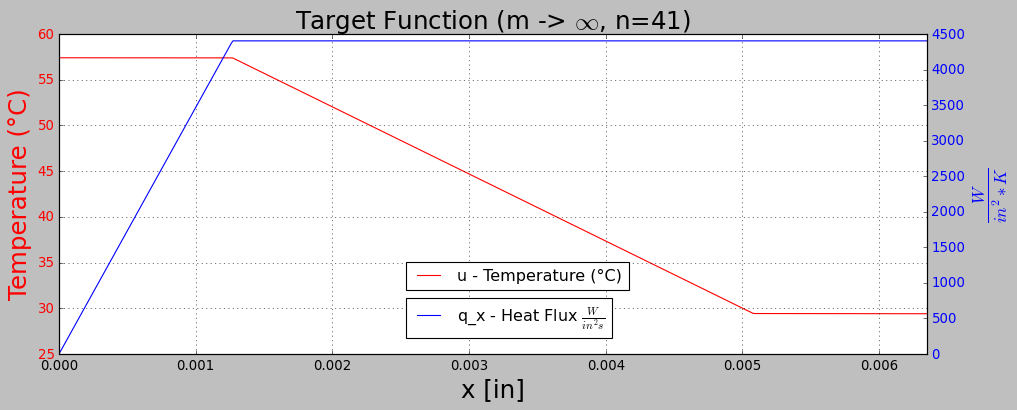

In [19]:
c_star_2 = np.linalg.solve(a_mtrx,b_vec)

n_pts = 500
x_pts = np.linspace(femlb_2.x_a, femlb_2.x_b, n_pts)
N = len(femlb_1.phi_list)

(fig, ax1) = plt.subplots(1, figsize=(14, 5))
ax2 = ax1.twinx()
plt.style.use('classic')
ax1.plot(x_pts,unit.convert_temperature(u_star(x_pts,femlb_2,c_star_2),'K','C'),"r-",label="u - Temperature (°C)")
ax2.plot(x_pts,diff_flux_x_star(x_pts,femlb_2,c_star_2),"b-",label=r"q_x - Heat Flux $\frac{W}{in^2 s}$")
ax1.grid()
plt.title(f"Target Function (m -> $\infty$, n={N})",fontsize=22)
ax1.set_ylabel(r"Temperature (°C)",fontsize=22, color="red")
ax2.set_ylabel(r"$\frac{W}{{in}^2  * K}$",fontsize=22, color="blue")
ax1.set_xlabel(r"x [in]",fontsize=22)
ax1.tick_params(axis="y",labelcolor="red")
ax2.tick_params(axis="y",labelcolor="blue")
ax1.legend(loc=(0.4,0.2))
ax2.legend(loc=(0.4,0.05))
ax1.set_xlim(x_a,x_b)
plt.show()

In [20]:
left_bound_temp = unit.convert_temperature(u_star(x_a,femlb_2,c_star_2)[0],'K','C')
right_bound_temp = unit.convert_temperature(u_star(x_b,femlb_2,c_star_2)[0],'K','C')

left_bound_flux =diff_flux_x_star(x_a,femlb_2,c_star_2)[0]
right_bound_flux = diff_flux_x_star(x_b,femlb_2,c_star_2)[0]
print("Left bound temperature:",format(left_bound_temp,".2f"),"°C")
print("Right bound temperature:",format(right_bound_temp,".2f"),"°C")
print("*"*60)
print("Left bound flux:",format(left_bound_flux,".2f"),r"W/in2 K")
print("Right bound flux:",format(right_bound_flux,".2f"),r"W/in2 K")
print("\nu_ref:",unit.convert_temperature(x_max_u_ref,'K','C'),"°C")
print("h:",h, "W/in^2 K")

Left bound temperature: 57.40 °C
Right bound temperature: 29.40 °C
************************************************************
Left bound flux: -0.00 W/in2 K
Right bound flux: 4403.40 W/in2 K

u_ref: 25.0 °C
h: 1000 W/in^2 K


In [21]:
import pandas as pd
from IPython.display import HTML

x_table = np.linspace(femlb_2.x_a,femlb_2.x_b,20)

u_values = u_star(x_table,femlb_2,c_star_2) 
q_values = diff_flux_x_star(x_table,femlb_2,c_star_2)

df = pd.DataFrame({"x [cm]":x_table*100,"T [K]":u_values,"q_x [W/m^2]":q_values})
pd.options.display.float_format = '{:,.2f}'.format
HTML(df.to_html(index=False))

x [cm],T [K],q_x [W/m^2]
0.00,330.55,-0.00
0.03,330.55,"1,158.79"
0.07,330.55,"2,317.58"
0.10,330.54,"3,476.37"
0.13,330.05,"4,403.40"
0.17,327.59,"4,403.40"
0.20,325.14,"4,403.40"
0.23,322.69,"4,403.40"
0.27,320.24,"4,403.40"
0.30,317.78,"4,403.40"


#### [Test 3](#toc)<a id="3DomainsNeumannNeumann"></a>
## 3 Domains Neumann/Neumann Coolant Heat Sink

In [22]:
#Interface locations
x_int_a = 0.05*unit.inch
x_int_b = 0.20*unit.inch

x_a = 0.0*unit.inch
x_b = 0.25*unit.inch

locList = [x_int_a,x_int_b]
#numPartsList = [n_felem_plate,n_felem_coolant,n_felem_plate_2]
numPartsList=[5,5,5]
bc_x_min = "neumann"
bc_x_max = "robin"

domain_partition = get_domain_partition(degree, locList,numPartsList, x_a, x_b,bc_x_min,bc_x_max)

kList = [k_plate,k_coolant,k_plate]

#Heat Transfer Coefficient
h = 1e-5 


#Heat sink in coolant
s_source_coolant = -s_source * (x_int_a-x_a) / (x_int_b - x_int_a)

#Boundary Conditions (neumann on left, robin on right)
x_min_flux = 0
#x_max_u_ref = temp_ref  #K
x_max_u_ref = 290.2  #K


k_shape_pts = [(x_a,kList[0]),(x_int_a*0.99999,kList[0]),(x_int_a,kList[1]),(x_int_b*0.99999,kList[1]),(x_int_b,kList[2]),(x_b,kList[2])]
w_shape_pts =[(x_a,0),(x_b,0)]
s_shape_pts =[(x_a,0),(x_b,0)]
f_shape_pts = [(x_a,s_source),(x_int_a*0.99999,s_source),(x_int_a,s_source_coolant),(x_int_b*0.99999,s_source_coolant),(x_int_b,0),(x_b,0)]


femlb_3 = femLagrange(x_a,x_b,degree,1,f_shape_pts,k_shape_pts,s_shape_pts,w_shape_pts,domain_partition,0,0,0,0,bc_x_min,bc_x_max,h,x_min_flux,x_max_u_ref)

a_mtrx = assemble_a_mtrx_neumann_robin(femlb_3)

b_vec = assemble_b_vec_neumann_robin(femlb_3)

integral_of_source_bias = scipy.integrate.quad(femlb_3.source_bias,x_a,x_b)
print("Integral of source bias is",integral_of_source_bias[0])


Integral of source bias is 7.305336674807663e-15


In [23]:
print("a_mtrx rank:",np.linalg.matrix_rank(a_mtrx))
print("a_mtrx shape:",a_mtrx.shape)
if np.linalg.matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print("A mtrx is full rank")
else:
    print("A mtrx is deficient")
    id_mtrx = np.identity(a_mtrx.shape[0])
    eps = 1e-5

    a_mtrx_fixed = (a_mtrx.transpose() @ a_mtrx) + (eps * id_mtrx)
    a_mtrx = a_mtrx_fixed
    print("A mtrx has been fixed")

a_mtrx rank: 31
a_mtrx shape: (31, 31)
A mtrx is full rank


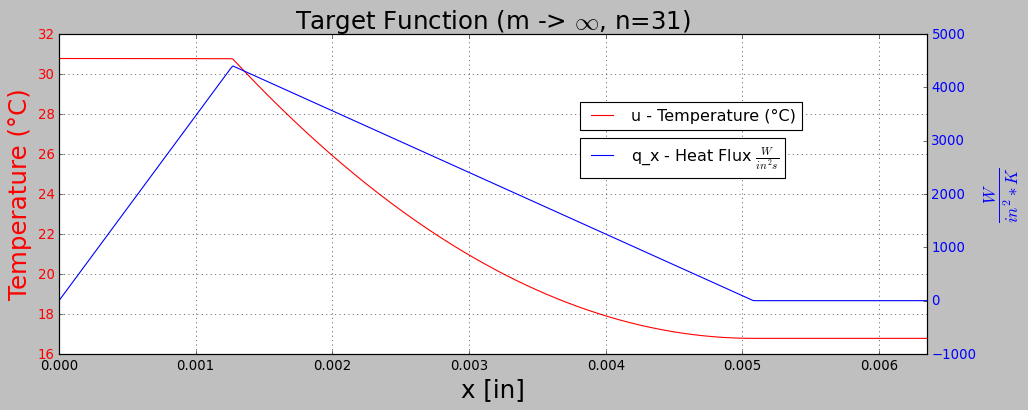

Average temperature: 295.5261337173149


In [24]:
c_star_3 = np.linalg.solve(a_mtrx,b_vec)

n_pts = 500
x_pts = np.linspace(femlb_3.x_a, femlb_3.x_b, n_pts)
N = len(femlb_3.phi_list)

(fig, ax1) = plt.subplots(1, figsize=(14, 5))
ax2 = ax1.twinx()
plt.style.use('classic')
ax1.plot(x_pts,unit.convert_temperature(u_star(x_pts,femlb_3,c_star_3),'K','C'),"r-",label="u - Temperature (°C)")
ax2.plot(x_pts,diff_flux_x_star(x_pts,femlb_3,c_star_3),"b-",label=r"q_x - Heat Flux $\frac{W}{in^2 s}$")
ax1.grid()
plt.title(f"Target Function (m -> $\infty$, n={N})",fontsize=22)
ax1.set_ylabel(r"Temperature (°C)",fontsize=22, color="red")
ax2.set_ylabel(r"$\frac{W}{{in}^2  * K}$",fontsize=22, color="blue")
ax1.set_xlabel(r"x [in]",fontsize=22)
ax1.tick_params(axis="y",labelcolor="red")
ax2.tick_params(axis="y",labelcolor="blue")
ax1.legend(loc=(0.6,0.7))
ax2.legend(loc=(0.6,0.55))
ax1.set_xlim(x_a,x_b)
plt.show()

(temp_integral, error) = scipy.integrate.quad(u_star,x_a,x_b,args=(femlb_3,c_star_3),limit=1000, epsrel=10e-7, epsabs=10e-7)
print("Average temperature:",temp_integral/(x_b-x_a))

In [25]:
left_bound_temp = unit.convert_temperature(u_star(x_a,femlb_3,c_star_3)[0],'K','C')
right_bound_temp = unit.convert_temperature(u_star(x_b,femlb_3,c_star_3)[0],'K','C')

left_bound_flux =diff_flux_x_star(x_a,femlb_3,c_star_3)[0]
right_bound_flux = diff_flux_x_star(x_b,femlb_3,c_star_3)[0]
print("Left bound temperature:",format(left_bound_temp,".2f"),"°C")
print("Right bound temperature:",format(right_bound_temp,".2f"),"°C")
print("*"*60)
print("Left bound flux:",format(left_bound_flux,".2f"),r"W/in2 K")
print("Right bound flux:",format(right_bound_flux,".2f"),r"W/in2 K")
print("\nu_ref:",unit.convert_temperature(x_max_u_ref,'K','C'),"°C")
print("h:",h, "W/in^2 K")

Left bound temperature: 30.77 °C
Right bound temperature: 16.78 °C
************************************************************
Left bound flux: -0.00 W/in2 K
Right bound flux: -0.00 W/in2 K

u_ref: 17.05000000000001 °C
h: 1e-05 W/in^2 K


In [26]:
import pandas as pd
from IPython.display import HTML

x_table = np.linspace(femlb_3.x_a,femlb_3.x_b,20)

u_values = u_star(x_table,femlb_3,c_star_3) 
q_values = diff_flux_x_star(x_table,femlb_3,c_star_3)

df = pd.DataFrame({"x [cm]":x_table*100,"T [K]":u_values,"q_x [W/m^2]":q_values})
pd.options.display.float_format = '{:,.2f}'.format
HTML(df.to_html(index=False))

x [cm],T [K],q_x [W/m^2]
0.00,303.92,-0.00
0.03,303.92,"1,158.79"
0.07,303.92,"2,317.58"
0.10,303.92,"3,476.37"
0.13,303.43,"4,326.15"
0.17,301.12,"3,939.89"
0.20,299.04,"3,553.62"
0.23,297.17,"3,167.36"
0.27,295.51,"2,781.10"
0.30,294.07,"2,394.83"


In [27]:
'''Input file'''

'Input file'

In [28]:
'''Run MOOSE App'''

'Run MOOSE App'

In [29]:
'''Solution'''

'Solution'

#### [Moose Test 1](#toc)<a id="Moose2Domain"></a>

In [30]:
'''Plot function for FEM Solution'''
def plot_solution(df1=None, df2=None, 
                  x_scale=1,
                  y1_scale=1,
                  y2_scale=1,
                  xlabel=r'$x$ []',
                  y1label=r'$u_h(x)$ []',
                  y2label=r'$q_h(x)$ []',
                  df3=None,
                  title='No Title', 
                  u1_legend='no u1 legend',
                  u2_legend='no u2 legend',
                  u3_legend='no u3 legend',
                  u1_flux_legend='no u1 flux legend',
                  u2_flux_legend='no u2 flux legend',
                  u3_flux_legend='no u2 flux legend',
                  flux_decimal_digits=5,
                  femlb=None,
                  c_vec=None,
                  scale_temp=None
                  ):
    '''Plot solution for plate and coolant
    '''
    import matplotlib.pyplot as plt
    #%matplotlib inline
    plt.style.use('dark_background')
    import numpy as np
    from scipy import constants as unit

    (fig, ax1) = plt.subplots(1, figsize=(15, 6))

    if df1 is not None:
        ax1.plot(df1['x']*x_scale, unit.convert_temperature(df1['tempPlate'],'K','C'), 'r*-', label=u1_legend)
    if df2 is not None:
        ax1.plot(df2['x']*x_scale, unit.convert_temperature(df2['tempCoolant'],'K','C'), 'r*-', label=u2_legend)
    if df3 is not None:
        ax1.plot(df3['x']*x_scale, unit.convert_temperature(df3['tempRightPlate'],'K','C'), 'r*-',label=u2_legend)
    
    ax2 = None

    if femlb is not None:
        ax2 = ax1.twinx()
        n_pts = 300
        x_pts = np.linspace(femlb.x_a, femlb.x_b, n_pts)
        if scale_temp is None:
            ax1.plot(x_pts*x_scale,unit.convert_temperature(u_star(x_pts,femlb,c_vec),'K','C'),"m-",label="Python Calculations")
        else:
            ax1.plot(x_pts*x_scale,unit.convert_temperature(u_star(x_pts,femlb,c_vec)-u_star(x_a,femlb,c_vec)+df1['tempPlate'][0],'K','C'),"m-",label="Python Calculations")
        ax2.plot(x_pts*x_scale,diff_flux_x_star(x_pts,femlb,c_vec)*y2_scale,"c-",label=r"Python Calculations$")

        
    if df1 is not None and 'heatFluxPlate_x' in df1.columns:
        if ax2 is None:
            ax2 = ax1.twinx()
            
        ax2.plot(df1['x']*x_scale, np.round(df1['heatFluxPlate_x'].round(2)*y2_scale, flux_decimal_digits),'*-', color='yellow', label=u1_flux_legend)
        
    if df2 is not None and 'heatFluxCoolant_x' in df2.columns:
        
        if ax2 is None:
            ax2 = ax1.twinx()
            
        ax2.plot(df2['x']*x_scale, np.round(df2['heatFluxCoolant_x'].round(2)*y2_scale, flux_decimal_digits),'*-', color='yellow', label=u2_flux_legend)
    if df3 is not None and 'heatFluxRightPlate_x' in df3.columns:
        
        if ax2 is None:
            ax2 = ax1.twinx()
            
        ax2.plot(df3['x']*x_scale, np.round(df3['heatFluxRightPlate_x'].round(2)*y2_scale, flux_decimal_digits),'*-', color='yellow', label=u3_flux_legend)

    if ax2 is not None:
        ax2.set_ylabel(y2label, fontsize=16, color='white')
        ax2.tick_params(axis='y', labelcolor='white', labelsize=14)
        ax2.legend(loc='upper right', fontsize=12)
        #ax2.set_ylim(0,2)
        #ax2.grid(True)
        
    
    ax1.set_xlabel(xlabel, fontsize=18)
    ax1.set_ylabel(y1label, fontsize=18, color='white')
    ax1.tick_params(axis='y', labelcolor='white', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    #ax1.set_ylim(0,1)
    ax1.grid(True)
    ax1.legend(loc='center left', fontsize=12)
    
    plt.title(title, fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')
    return

In [31]:
'''Domain'''
x_a = 0.0
x_i_l = 0.05*unit.inch
x_i_r = 0.2*unit.inch
x_b = 0.25*unit.inch

In [32]:
'''Parameters'''
k_plate = 6.096*unit.watt/unit.inch/unit.kelvin
k_coolant = 0.01524*unit.watt/unit.inch/unit.kelvin
rho_coolant = 0.0164*unit.kg/unit.inch**3
cp_coolant = 4168*unit.joule/unit.kg/unit.kelvin

s_source = 56.818*unit.watt/unit.inch**3

#x_i_l transfer
interfacial_heat_transfer_coeff = 1e15*unit.watt/unit.meter**2/unit.kelvin
interfacial_adsorption_coeff = 0

#x_i_r transfer
heat_transfer_coeff = 1000
temp_ref = unit.convert_temperature(25,'C','K')

velocity = np.zeros(3)
velocity[1] = 1*unit.milli*unit.meter/unit.second

In [33]:
'''FEM Solution'''
n_felem_plate = 3
n_felem_coolant = 10

order = 'second'
flux_order = 'first'

fdp_full = True
n_plot_pts_plate = 2*n_felem_plate + 1
n_plot_pts_coolant = 2*n_felem_coolant + 1

In [34]:
def write_input_file(pjfnk=False):
    import pyhit
    import moosetree
    root = pyhit.load('')
    
    prblm = root.insert(-1,'Problem')
    prblm['type'] = 'FEProblem'
    prblm['coord_type'] = 'XYZ'

    mesh = root.insert(-1,'Mesh')
    
    omega1 = mesh.insert(-1,'omega1')
    omega1['type'] = 'GeneratedMeshGenerator'
    omega1['dim'] = 1
    omega1['xmin'] = x_a
    omega1['xmax'] = x_i_l
    omega1['nx'] = n_felem_plate
    omega1['boundary_name_prefix'] = 'omega_1'
    if order == 'second':
        omega1['elem_type'] = 'edge3'
    
    omega2 = mesh.insert(-1,'omega2')
    omega2['type'] = 'GeneratedMeshGenerator'
    omega2['dim'] = 1
    omega2['xmin'] = x_i_l
    omega2['xmax'] = x_i_r
    omega2['nx'] = n_felem_coolant
    omega2['boundary_name_prefix'] = 'omega_2'
    if order == 'second':
        omega2['elem_type'] = 'edge3'

    omega = mesh.insert(-1,'omega')
    omega['type'] = 'StitchedMeshGenerator'
    omega['inputs'] = "'omega1 omega2'"
    omega['stitch_boundaries_pairs'] = "'omega_1_right omega_2_left'"
    omega['clear_stitched_boundary_ids'] = 'true'
    
    mod1 = mesh.insert(-1,'mod1')
    mod1['type'] = 'SubdomainBoundingBoxGenerator'
    mod1['input'] = 'omega'
    mod1['block_id'] = 1
    mod1['block_name'] = 'omega_1'
    mod1['bottom_left'] = str(x_a)+' 0 0'
    mod1['top_right'] = str(x_i_l)+' 1 0'
    
    mod2 = mesh.insert(-1,'mod2')
    mod2['type'] = 'SubdomainBoundingBoxGenerator'
    mod2['input'] = 'mod1'
    mod2['block_id'] = 2
    mod2['block_name'] = 'omega_2'
    mod2['bottom_left'] = str(x_i_l)+' 0 0'
    mod2['top_right'] = str(x_i_r)+' 1 0'
    
    mod3 = mesh.insert(-1,'mod3')
    mod3['type'] = 'SideSetsBetweenSubdomainsGenerator'
    mod3['input'] = 'mod2'
    mod3['primary_block'] = 'omega_1'
    mod3['paired_block'] = 'omega_2' 
    mod3['new_boundary'] = 'interface_12'
    
    mod4 = mesh.insert(-1,'mod4')
    mod4['type'] = 'SideSetsAroundSubdomainGenerator'
    mod4['input'] = 'mod3'
    mod4['block'] = 'omega_1'
    mod4['normal'] = '-1 0 0'
    mod4['new_boundary'] = 'left'
    
    mod5 = mesh.insert(-1,'mod5')
    mod5['type'] = 'SideSetsAroundSubdomainGenerator'
    mod5['input'] = 'mod4'
    mod5['block'] = 'omega_2'
    mod5['normal'] = '1 0 0'
    mod5['new_boundary'] = 'omega_2_right'

    vars = root.insert(-1,'Variables')
    
    temp_cool = vars.insert(-1,'tempPlate')
    temp_cool['block'] = 'omega_1'
    temp_cool['order'] = order
    temp_cool['family'] = 'lagrange'
    temp_cool['initial_condition'] = 1
    
    temp_fuel = vars.insert(-1,'tempCoolant')
    temp_fuel['block'] = 'omega_2'
    temp_fuel['order'] = order
    temp_fuel['family'] = 'lagrange'
    temp_fuel['initial_condition'] = 1
    
    aux_vars = root.insert(-1,'AuxVariables')
    
    heat_flux_cool = aux_vars.insert(-1,'heatFluxPlate')
    heat_flux_cool['block'] = 'omega_1'
    heat_flux_cool['order'] = flux_order
    heat_flux_cool['family'] = 'monomial_vec'
    
    heat_flux_cool_r = aux_vars.insert(-1,'heatFluxPlate_x')
    heat_flux_cool_r['block'] = 'omega_1'
    heat_flux_cool_r['order'] = flux_order
    heat_flux_cool_r['family'] = 'monomial'
    
    heat_flux_fuel = aux_vars.insert(-1,'heatFluxCoolant')
    heat_flux_fuel['block'] = 'omega_2'
    heat_flux_fuel['order'] = flux_order
    heat_flux_fuel['family'] = 'monomial_vec'
    
    heat_flux_fuel_r = aux_vars.insert(-1,'heatFluxCoolant_x')
    heat_flux_fuel_r['block'] = 'omega_2'
    heat_flux_fuel_r['order'] = flux_order
    heat_flux_fuel_r['family'] = 'monomial'

    kernels = root.insert(-1,'Kernels')
    
    conduction = kernels.insert(-1,'heat-conduction-plate')
    conduction['type'] = 'HeatConduction'
    conduction['block'] = 'omega_1'
    conduction['variable'] = 'tempPlate'
    conduction['thermCond'] = k_plate
    
    source = kernels.insert(-1,'heat-source-plate')
    source['type'] = 'HeatSource'
    source['block'] = 'omega_1'
    source['variable'] = 'tempPlate'
    source['sourceS'] = s_source
    
    conduction = kernels.insert(-1,'heat-conduction-coolant')
    conduction['type'] = 'HeatConduction'
    conduction['block'] = 'omega_2'
    conduction['variable'] = 'tempCoolant'
    conduction['thermCond'] = k_coolant
    
    convection = kernels.insert(-1,'heat-convection-coolant')
    convection['type'] = 'HeatConvection'
    convection['block'] = 'omega_2'
    convection['variable'] = 'tempCoolant'
    convection['massDensity'] = rho_coolant
    convection['heatCapacity'] = cp_coolant
    convection['velocity'] = str(velocity[0])+' '+str(velocity[1])+' '+str(velocity[2])
    
    interf_kernels = root.insert(-1,'InterfaceKernels')
    
    n_flux = interf_kernels.insert(-1,'normal-heat-flux-continuity')
    n_flux['type'] = 'InterfaceNormalFluxContinuity'
    n_flux['variable'] = 'tempPlate'
    n_flux['neighbor_var'] = 'tempCoolant'
    n_flux['boundary'] = 'interface_12'
    n_flux['thermCond'] = k_plate
    n_flux['thermCondNeighbor'] = k_coolant
    
    t_jump = interf_kernels.insert(-1,'temperature-jump')
    t_jump['type'] = 'InterfaceJump'
    t_jump['variable'] = 'tempPlate'
    t_jump['neighbor_var'] = 'tempCoolant'
    t_jump['boundary'] = 'interface_12'
    t_jump['transferCoeff'] = interfacial_heat_transfer_coeff
    t_jump['adsorptionCoeff'] = interfacial_adsorption_coeff
    t_jump['thermCondCoeff'] = k_plate

    aux_kernels = root.insert(-1,'AuxKernels')
    
    heat_flux = aux_kernels.insert(-1,'heat-flux-plate')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['block'] = 'omega_1'
    heat_flux['field'] = 'tempPlate'
    heat_flux['thCondCoeff'] = k_plate
    heat_flux['variable'] = 'heatFluxPlate'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-plate-x')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['block'] = 'omega_1'
    heat_flux_r['vector_variable'] = 'heatFluxPlate'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxPlate_x'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    heat_flux = aux_kernels.insert(-1,'heat-flux-coolant')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['block'] = 'omega_2'
    heat_flux['field'] = 'tempCoolant'
    heat_flux['thCondCoeff'] = k_coolant
    heat_flux['variable'] = 'heatFluxCoolant'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-coolant-x')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['block'] = 'omega_2'
    heat_flux_r['vector_variable'] = 'heatFluxCoolant'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxCoolant_x'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    bcs = root.insert(-1,'BCs')
    
    cl = bcs.insert(-1,'center-line')
    cl['type'] = 'NeumannBC'
    cl['variable'] = 'tempPlate'
    cl['boundary'] = 'left'
    cl['value'] = 0 
    
    ro = bcs.insert(-1,'x_i_r')
    ro['type'] = 'NormalHeatFluxBC'
    ro['variable'] = 'tempCoolant'
    ro['boundary'] = 'omega_2_right'
    ro['refTempFunc'] = 'refTempFunc'
    ro['transferCoeff'] = heat_transfer_coeff
    
    functions = root.insert(-1,'Functions')
    
    ref_temp_func = functions.insert(-1, 'refTempFunc')
    ref_temp_func['type'] = 'ParsedFunction'
    ref_temp_func['value'] = 'temp_ref'
    ref_temp_func['vars'] = 'temp_ref'
    ref_temp_func['vals'] = str(temp_ref)
    
    if pjfnk:
        exe = root.insert(-1,'Executioner')
        exe['type'] = 'Steady'
        exe['solve_type']  = 'PJFNK'
        exe['petsc_options_iname']  = '-pc_type -pc_hypre_type'
        exe['petsc_options_value']  = 'hypre boomeramg'
        exe['l_max_its']  = 20
        exe['l_tol']  = 1e-5
        exe['nl_max_its']  = 15
        exe['nl_rel_tol']  = 1e-8
        exe['nl_abs_tol']  = 1e-8
    elif fdp_full:
        pre = root.insert(-1, 'Preconditioning')
        pre['active'] = 'fdp-newt-full'
        
        fdp = pre.insert(-1, 'fdp-newt-full')
        fdp['type'] = 'FDP'
        fdp['full'] = 'true'
        fdp['solve_type'] = 'NEWTON'
        fdp['petsc_options_iname'] = ""'-pc_type -mat_fd_coloring_err -mat_fd_type'""
        fdp['petsc_options_value'] = ""'lu  1e-8          ds'""
        
        exe = root.insert(-1,'Executioner')
        exe['type'] = 'Steady'

    vp = root.insert(-1,'VectorPostprocessors')
    
    omega_1 = vp.insert(-1,'omega_1')
    omega_1['type'] = 'LineValueSampler'
    omega_1['execute_on'] = 'timestep_end final'
    omega_1['variable'] = 'tempPlate heatFluxPlate_x'  
    omega_1['start_point'] = str(x_a)+' 0 0'
    omega_1['end_point'] = str(x_i_l*0.995)+' 0 0'
    omega_1['num_points'] = n_plot_pts_plate
    omega_1['sort_by'] = 'id'
    
    omega_2 = vp.insert(-1,'omega_2')
    omega_2['type'] = 'LineValueSampler'
    omega_2['execute_on'] = 'timestep_end final'
    omega_2['variable'] = 'tempCoolant heatFluxCoolant_x'  
    omega_2['start_point'] = str(x_i_l*1.005)+' 0 0'
    omega_2['end_point'] = str(x_i_r)+' 0 0'
    omega_2['num_points'] = n_plot_pts_coolant
    omega_2['sort_by'] = 'id'  

    out = root.insert(-1,'Outputs')
    out['console'] = 'true'
    csv = out.insert(-1,'csv')
    csv['type'] = 'CSV'
    csv['file_base'] = 'output'
    csv['execute_on'] = 'final'
    
    debug = root.insert(-1,'Debug')
    debug['show_var_residual_norms'] = 'true'

    pyhit.write('input.hit', root)

In [35]:
'''Input file'''
write_input_file()
!cat input.hit

[Problem]
  type = FEProblem
  coord_type = XYZ
[]
[Mesh]
  [omega1]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.0
    xmax = 0.00127
    nx = 3
    boundary_name_prefix = omega_1
    elem_type = edge3
  []
  [omega2]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.00127
    xmax = 0.00508
    nx = 10
    boundary_name_prefix = omega_2
    elem_type = edge3
  []
  [omega]
    type = StitchedMeshGenerator
    inputs = 'omega1 omega2'
    stitch_boundaries_pairs = 'omega_1_right omega_2_left'
    clear_stitched_boundary_ids = true
  []
  [mod1]
    type = SubdomainBoundingBoxGenerator
    input = omega
    block_id = 1
    block_name = omega_1
    bottom_left = '0.0 0 0'
    top_right = '0.00127 1 0'
  []
  [mod2]
    type = SubdomainBoundingBoxGenerator
    input = mod1
    block_id = 2
    block_name = omega_2
    bottom_left = '0.00127 0 0'
    top_right = '0.00508 1 0'
  []
  [mod3]
    type = SideSetsBetweenSubdomainsGenerator
    input = mod2
    primary_b

In [36]:
'''Delete any previous *.csv files'''
!rm output_omega_*.csv

In [37]:
'''Run Engy5310P1 MOOSE App'''

!./heated_plate-opt -i input.hit


In ReplicatedMesh::stitch_meshes:
This mesh has 1 nodes on boundary 1.
Other mesh has 1 nodes on boundary 0.
Minimum edge length on both surfaces is 0.000423333.
In ReplicatedMesh::stitch_meshes:
Found 1 matching nodes.

Framework Information:
MOOSE Version:           git commit b98ea2c450 on 2021-09-23
LibMesh Version:         
PETSc Version:           3.15.1
SLEPc Version:           3.15.1
Current Time:            Sun Dec 19 04:37:35 2021
Executable Timestamp:    Sun Dec 19 01:33:32 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   27
  Elems:                   13
  Num Subdomains:          2

Nonlinear System:
  Num DOFs:                28
  Num Local DOFs:          28
  Variables:               "tempPlate" "tempCoolant" 
  Finite Element Types:    "LAGRANGE" "LAGRANGE" 
  Approximation Orders:    "SECOND" "SECOND" 

Auxiliary

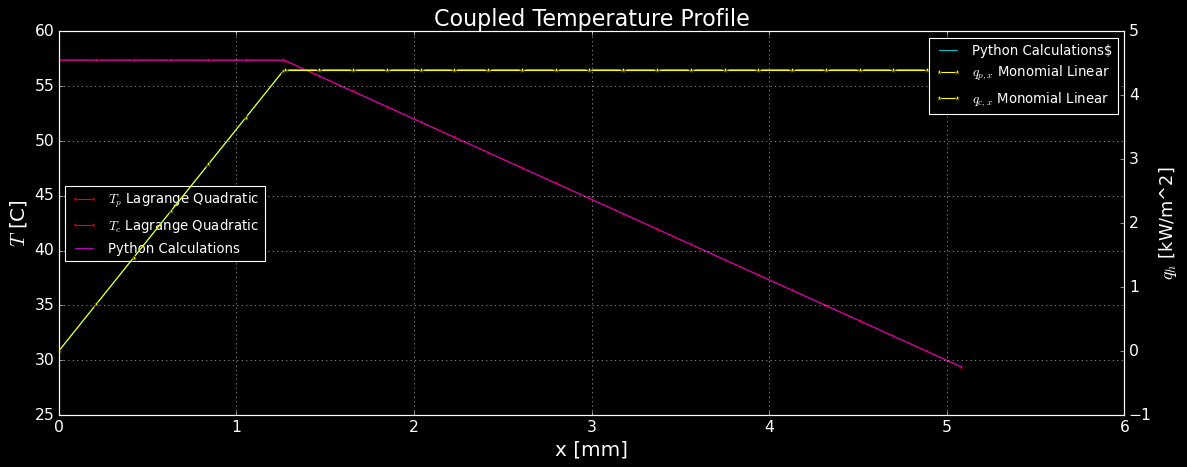

In [38]:
'''Show FEM Solution'''

import pandas as pd
df1 = pd.read_csv('output_omega_1_0002.csv')
df2 = pd.read_csv('output_omega_2_0002.csv')
    
plot_solution(df1=df1, df2=df2, title='Coupled Temperature Profile',
              u1_legend=r'$T_p$ Lagrange Quadratic',
              u1_flux_legend=r'$q_{p,x}$ Monomial Linear',
              u2_legend=r'$T_c$ Lagrange Quadratic',
              u2_flux_legend=r'$q_{c,x}$ Monomial Linear',
              x_scale=1/unit.milli/unit.meter,
              xlabel='x [mm]', y1label=r'$T$ [C]', 
              y2_scale=1/unit.kilo, y2label=r'$q_h$ [kW/m^2]',
              femlb=femlb_1,
              c_vec=c_star_1)

#### [Moose Test 2](#toc)<a id="Moose3DomainNeumannRobin"></a>
## 3 Coupled Domains with Robin B/C on right side and no coolant heat source/sink

In [39]:
'''Parameters'''
n_felem_plate = 10
n_felem_coolant = 10
n_felem_plate_2 = 10

s_source_coolant= 0.0*unit.watt/unit.inch**3
s_source_right_plate = 0.0*unit.watt/unit.inch**3

In [40]:
'''FEM'''
n_plot_pts_plate = 10
n_plot_pts_coolant = 10
n_plot_pts_right_plate = 10

In [41]:
#Working write_input_file 
def write_input_file_3Domains(pjfnk=False):
    import pyhit
    import moosetree
    root = pyhit.load('')
    
    prblm = root.insert(-1,'Problem')
    prblm['type'] = 'FEProblem'
    prblm['coord_type'] = 'XYZ'

    mesh = root.insert(-1,'Mesh')
    
    omega1 = mesh.insert(-1,'omega1')
    omega1['type'] = 'GeneratedMeshGenerator'
    omega1['dim'] = 1
    omega1['xmin'] = x_a
    omega1['xmax'] = x_i_l
    omega1['nx'] = n_felem_plate
    #omega1['boundary_name_prefix'] = "omega_1"
    if order == 'second':
        omega1['elem_type'] = 'edge3'
    
    omega2 = mesh.insert(-1,'omega2')
    omega2['type'] = 'GeneratedMeshGenerator'
    omega2['dim'] = 1
    omega2['xmin'] = x_i_l
    omega2['xmax'] = x_i_r
    omega2['nx'] = n_felem_coolant
    #omega2['boundary_name_prefix'] = "omega_2"
    if order == 'second':
        omega2['elem_type'] = 'edge3'
        
    omega3 = mesh.insert(-1,'omega3')
    omega3['type'] = 'GeneratedMeshGenerator'
    omega3['dim'] = 1
    omega3['xmin'] = x_i_r
    omega3['xmax'] = x_b
    omega3['nx'] = n_felem_plate_2
    #omega3['boundary_name_prefix'] = "omega_3"
    if order == 'second':
        omega3['elem_type'] = 'edge3'

    omega = mesh.insert(-1,'omega')
    omega['type'] = 'StitchedMeshGenerator'
    omega['inputs'] = "'omega1 omega2 omega3'"
    omega['stitch_boundaries_pairs'] = "'right left; right left'"
    omega['clear_stitched_boundary_ids'] = 'true'
    
    mod1 = mesh.insert(-1,'mod1')
    mod1['type'] = 'SubdomainBoundingBoxGenerator'
    mod1['input'] = 'omega'
    mod1['block_id'] = 1
    mod1['block_name'] = 'omega_1'
    mod1['bottom_left'] = str(x_a)+' 0 0'
    mod1['top_right'] = str(x_i_l)+' 1 0'
    
    mod2 = mesh.insert(-1,'mod2')
    mod2['type'] = 'SubdomainBoundingBoxGenerator'
    mod2['input'] = 'mod1'
    mod2['block_id'] = 2
    mod2['block_name'] = 'omega_2'
    mod2['bottom_left'] = str(x_i_l)+' 0 0'
    mod2['top_right'] = str(x_i_r)+' 1 0'
    
    mod3 = mesh.insert(-1,'mod3')
    mod3['type'] = 'SubdomainBoundingBoxGenerator'
    mod3['input'] = 'mod2'
    mod3['block_id'] = 3
    mod3['block_name'] = 'omega_3'
    mod3['bottom_left'] = str(x_i_r)+' 0 0'
    mod3['top_right'] = str(x_b)+' 1 0'
    
    mod4 = mesh.insert(-1,'mod4')
    mod4['type'] = 'SideSetsBetweenSubdomainsGenerator'
    mod4['input'] = 'mod3'
    mod4['primary_block'] = 'omega_1'
    mod4['paired_block'] = 'omega_2' 
    mod4['new_boundary'] = 'interface_12'
    
    mod5 = mesh.insert(-1,'mod5')
    mod5['type'] = 'SideSetsBetweenSubdomainsGenerator'
    mod5['input'] = 'mod4'
    mod5['primary_block'] = 'omega_2'
    mod5['paired_block'] = 'omega_3' 
    mod5['new_boundary'] = 'interface_23'
    
    mod6 = mesh.insert(-1,'mod6')
    mod6['type'] = 'SideSetsAroundSubdomainGenerator'
    mod6['input'] = 'mod5'
    mod6['block'] = 'omega_1'
    mod6['normal'] = '-1 0 0'
    mod6['new_boundary'] = 'left'
    
    mod7 = mesh.insert(-1,'mod7')
    mod7['type'] = 'SideSetsAroundSubdomainGenerator'
    mod7['input'] = 'mod6'
    mod7['block'] = 'omega_3'
    mod7['normal'] = '1 0 0'
    mod7['new_boundary'] = 'right'

    vars = root.insert(-1,'Variables')
    
    temp_cool = vars.insert(-1,'tempPlate')
    temp_cool['block'] = 'omega_1'
    temp_cool['order'] = order
    temp_cool['family'] = 'lagrange'
    temp_cool['initial_condition'] = 300
    
    temp_fuel = vars.insert(-1,'tempCoolant')
    temp_fuel['block'] = 'omega_2'
    temp_fuel['order'] = order
    temp_fuel['family'] = 'lagrange'
    temp_fuel['initial_condition'] = 300
    
    temp_right_plate = vars.insert(-1,'tempRightPlate')
    temp_right_plate['block'] = 'omega_3'
    temp_right_plate['order'] = order
    temp_right_plate['family'] = 'lagrange'
    temp_right_plate['initial_condition'] = 300
    
    aux_vars = root.insert(-1,'AuxVariables')
    
    heat_flux_cool = aux_vars.insert(-1,'heatFluxPlate')
    heat_flux_cool['block'] = 'omega_1'
    heat_flux_cool['order'] = flux_order
    heat_flux_cool['family'] = 'monomial_vec'
    
    heat_flux_cool_r = aux_vars.insert(-1,'heatFluxPlate_x')
    heat_flux_cool_r['block'] = 'omega_1'
    heat_flux_cool_r['order'] = flux_order
    heat_flux_cool_r['family'] = 'monomial'
    
    heat_flux_fuel = aux_vars.insert(-1,'heatFluxCoolant')
    heat_flux_fuel['block'] = 'omega_2'
    heat_flux_fuel['order'] = flux_order
    heat_flux_fuel['family'] = 'monomial_vec'
    
    heat_flux_fuel_r = aux_vars.insert(-1,'heatFluxCoolant_x')
    heat_flux_fuel_r['block'] = 'omega_2'
    heat_flux_fuel_r['order'] = flux_order
    heat_flux_fuel_r['family'] = 'monomial'
    
    heat_flux_right_plate = aux_vars.insert(-1,'heatFluxRightPlate')
    heat_flux_right_plate['block'] = 'omega_3'
    heat_flux_right_plate['order'] = flux_order
    heat_flux_right_plate['family'] = 'monomial_vec'
    
    heat_flux_right_plate_r = aux_vars.insert(-1,'heatFluxRightPlate_x')
    heat_flux_right_plate_r['block'] = 'omega_3'
    heat_flux_right_plate_r['order'] = flux_order
    heat_flux_right_plate_r['family'] = 'monomial'

    kernels = root.insert(-1,'Kernels')
    
    conduction = kernels.insert(-1,'heat-conduction-plate')
    conduction['type'] = 'HeatConduction'
    conduction['block'] = 'omega_1'
    conduction['variable'] = 'tempPlate'
    conduction['thermCond'] = k_plate
    
    source = kernels.insert(-1,'heat-source-plate')
    source['type'] = 'HeatSource'
    source['block'] = 'omega_1'
    source['variable'] = 'tempPlate'
    source['sourceS'] = s_source
    
    conduction = kernels.insert(-1,'heat-conduction-coolant')
    conduction['type'] = 'HeatConduction'
    conduction['block'] = 'omega_2'
    conduction['variable'] = 'tempCoolant'
    conduction['thermCond'] = k_coolant
    
    convection = kernels.insert(-1,'heat-convection-coolant')
    convection['type'] = 'HeatConvection'
    convection['block'] = 'omega_2'
    convection['variable'] = 'tempCoolant'
    convection['massDensity'] = rho_coolant
    convection['heatCapacity'] = cp_coolant
    convection['velocity'] = str(velocity[0])+' '+str(velocity[1])+' '+str(velocity[2])
    
    source = kernels.insert(-1,'heat-source-coolant')
    source['type'] = 'HeatSource'
    source['block'] = 'omega_2'
    source['variable'] = 'tempCoolant'
    source['sourceS'] = s_source_coolant
    
    conduction = kernels.insert(-1,'heat-conduction-right-plate')
    conduction['type'] = 'HeatConduction'
    conduction['block'] = 'omega_3'
    conduction['variable'] = 'tempRightPlate'
    conduction['thermCond'] = k_plate
    
    #Used if there is a heater in the next plate
    """source = kernels.insert(-1,'heat-source-right-plate')
    source['type'] = 'HeatSource'
    source['block'] = 'omega_3'
    source['variable'] = 'tempRightPlate'
    source['sourceS'] = s_source_right_plate"""
    
    interf_kernels = root.insert(-1,'InterfaceKernels')
    
    n_flux = interf_kernels.insert(-1,'normal-heat-flux-continuity-12')
    n_flux['type'] = 'InterfaceNormalFluxContinuity'
    n_flux['variable'] = 'tempPlate'
    n_flux['neighbor_var'] = 'tempCoolant'
    n_flux['boundary'] = 'interface_12'
    n_flux['thermCond'] = k_plate
    n_flux['thermCondNeighbor'] = k_coolant
    
    t_jump = interf_kernels.insert(-1,'temperature-jump-12')
    t_jump['type'] = 'InterfaceJump'
    t_jump['variable'] = 'tempPlate'
    t_jump['neighbor_var'] = 'tempCoolant'
    t_jump['boundary'] = 'interface_12'
    t_jump['transferCoeff'] = interfacial_heat_transfer_coeff
    t_jump['adsorptionCoeff'] = interfacial_adsorption_coeff
    t_jump['thermCondCoeff'] = k_plate
    
    n_flux = interf_kernels.insert(-1,'normal-heat-flux-continuity-23')
    n_flux['type'] = 'InterfaceNormalFluxContinuity'
    n_flux['variable'] = 'tempCoolant'
    n_flux['neighbor_var'] = 'tempRightPlate'
    n_flux['boundary'] = 'interface_23'
    n_flux['thermCond'] = k_coolant
    n_flux['thermCondNeighbor'] = k_plate
    
    t_jump = interf_kernels.insert(-1,'temperature-jump-23')
    t_jump['type'] = 'InterfaceJump'
    t_jump['variable'] = 'tempCoolant'
    t_jump['neighbor_var'] = 'tempRightPlate'
    t_jump['boundary'] = 'interface_23'
    t_jump['transferCoeff'] = interfacial_heat_transfer_coeff
    t_jump['adsorptionCoeff'] = interfacial_adsorption_coeff
    t_jump['thermCondCoeff'] = k_coolant
    
    aux_kernels = root.insert(-1,'AuxKernels')
    
    heat_flux = aux_kernels.insert(-1,'heat-flux-plate')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['block'] = 'omega_1'
    heat_flux['field'] = 'tempPlate'
    heat_flux['thCondCoeff'] = k_plate
    heat_flux['variable'] = 'heatFluxPlate'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-plate-x')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['block'] = 'omega_1'
    heat_flux_r['vector_variable'] = 'heatFluxPlate'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxPlate_x'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    heat_flux = aux_kernels.insert(-1,'heat-flux-coolant')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['block'] = 'omega_2'
    heat_flux['field'] = 'tempCoolant'
    heat_flux['thCondCoeff'] = k_coolant
    heat_flux['variable'] = 'heatFluxCoolant'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-coolant-x')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['block'] = 'omega_2'
    heat_flux_r['vector_variable'] = 'heatFluxCoolant'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxCoolant_x'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    heat_flux = aux_kernels.insert(-1,'heat-flux-right-plate')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['block'] = 'omega_3'
    heat_flux['field'] = 'tempRightPlate'
    heat_flux['thCondCoeff'] = k_plate
    heat_flux['variable'] = 'heatFluxRightPlate'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-right-plate-x')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['block'] = 'omega_3'
    heat_flux_r['vector_variable'] = 'heatFluxRightPlate'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxRightPlate_x'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    bcs = root.insert(-1,'BCs')
    
    cl = bcs.insert(-1,'center-line')
    cl['type'] = 'NeumannBC'
    cl['variable'] = 'tempPlate'
    cl['boundary'] = 'left'
    cl['value'] = 0 
    
    #Old boundary condition at x=0.20 in (inteface b/w coolant channel and right plate)
    """ro = bcs.insert(-1,'x_i_r')
    ro['type'] = 'NormalHeatFluxBC'
    ro['variable'] = 'tempCoolant'
    ro['boundary'] = 'omega_2_right'
    ro['refTempFunc'] = 'refTempFunc'
    ro['transferCoeff'] = heat_transfer_coeff"""
    
    #Robin boundary condition
    ro = bcs.insert(-1,'x_b')
    ro['type'] = 'NormalHeatFluxBC'
    ro['variable'] = 'tempRightPlate'
    ro['boundary'] = 'right'
    ro['refTempFunc'] = 'refTempFunc'
    ro['transferCoeff'] = heat_transfer_coeff
    
    """#Neumann boundary condition
    ro = bcs.insert(-1,'x_b')
    ro['type'] = 'NeumannBC'
    ro['variable'] = 'tempRightPlate'
    ro['boundary'] = 'right'
    ro['value'] = 0"""
    
    functions = root.insert(-1,'Functions')
    
    ref_temp_func = functions.insert(-1, 'refTempFunc')
    ref_temp_func['type'] = 'ParsedFunction'
    ref_temp_func['value'] = 'temp_ref'
    ref_temp_func['vars'] = 'temp_ref'
    ref_temp_func['vals'] = str(temp_ref)
    
    if pjfnk:
        exe = root.insert(-1,'Executioner')
        exe['type'] = 'Steady'
        exe['solve_type']  = 'PJFNK'
        exe['petsc_options_iname']  = '-pc_type -pc_hypre_type'
        exe['petsc_options_value']  = 'hypre boomeramg'
        exe['l_max_its']  = 20
        exe['l_tol']  = 1e-5
        exe['nl_max_its']  = 15
        exe['nl_rel_tol']  = 1e-8
        exe['nl_abs_tol']  = 1e-8
    elif fdp_full:
        pre = root.insert(-1, 'Preconditioning')
        pre['active'] = 'fdp-newt-full'
        
        fdp = pre.insert(-1, 'fdp-newt-full')
        fdp['type'] = 'FDP'
        fdp['full'] = 'true'
        fdp['solve_type'] = 'NEWTON'
        fdp['petsc_options_iname'] = ""'-pc_type -mat_fd_coloring_err -mat_fd_type'""
        fdp['petsc_options_value'] = ""'lu  1e-8          ds'""
        
        exe = root.insert(-1,'Executioner')
        exe['type'] = 'Steady'
        

    vp = root.insert(-1,'VectorPostprocessors')
    
    omega_1 = vp.insert(-1,'omega_1')
    omega_1['type'] = 'LineValueSampler'
    omega_1['execute_on'] = 'timestep_end final'
    omega_1['variable'] = 'tempPlate heatFluxPlate_x'  
    omega_1['start_point'] = str(x_a)+' 0 0'
    omega_1['end_point'] = str(x_i_l*0.995)+' 0 0'
    omega_1['num_points'] = n_plot_pts_plate
    omega_1['sort_by'] = 'id'
    
    omega_2 = vp.insert(-1,'omega_2')
    omega_2['type'] = 'LineValueSampler'
    omega_2['execute_on'] = 'timestep_end final'
    omega_2['variable'] = 'tempCoolant heatFluxCoolant_x'  
    omega_2['start_point'] = str(x_i_l*1.005)+' 0 0'
    omega_2['end_point'] = str(x_i_r*0.995)+' 0 0'
    omega_2['num_points'] = n_plot_pts_coolant
    omega_2['sort_by'] = 'id'  

    omega_3 = vp.insert(-1,'omega_3')
    omega_3['type'] = 'LineValueSampler'
    omega_3['execute_on'] = 'timestep_end final'
    omega_3['variable'] = 'tempRightPlate heatFluxRightPlate_x'  
    omega_3['start_point'] = str(x_i_r*1.005)+' 0 0'
    omega_3['end_point'] = str(x_b*0.995)+' 0 0'
    omega_3['num_points'] = n_plot_pts_right_plate
    omega_3['sort_by'] = 'id'
    
    out = root.insert(-1,'Outputs')
    out['console'] = 'true'
    csv = out.insert(-1,'csv')
    csv['type'] = 'CSV'
    csv['file_base'] = 'output'
    csv['execute_on'] = 'final'
    
    debug = root.insert(-1,'Debug')
    debug['show_var_residual_norms'] = 'true'

    pyhit.write('input_3Domains.hit', root)

In [42]:
'''Input file'''
write_input_file_3Domains()
!cat input_3Domains.hit

[Problem]
  type = FEProblem
  coord_type = XYZ
[]
[Mesh]
  [omega1]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.0
    xmax = 0.00127
    nx = 10
    elem_type = edge3
  []
  [omega2]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.00127
    xmax = 0.00508
    nx = 10
    elem_type = edge3
  []
  [omega3]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.00508
    xmax = 0.00635
    nx = 10
    elem_type = edge3
  []
  [omega]
    type = StitchedMeshGenerator
    inputs = 'omega1 omega2 omega3'
    stitch_boundaries_pairs = 'right left; right left'
    clear_stitched_boundary_ids = true
  []
  [mod1]
    type = SubdomainBoundingBoxGenerator
    input = omega
    block_id = 1
    block_name = omega_1
    bottom_left = '0.0 0 0'
    top_right = '0.00127 1 0'
  []
  [mod2]
    type = SubdomainBoundingBoxGenerator
    input = mod1
    block_id = 2
    block_name = omega_2
    bottom_left = '0.00127 0 0'
    top_right = '0.00508 1 0'
  []
  [mod3]
    type

In [43]:
'''Delete any previous *.csv files'''
!rm output_omega_*.csv

In [44]:
'''Run MOOSE App'''
!./heated_plate-opt -i input_3Domains.hit


In ReplicatedMesh::stitch_meshes:
This mesh has 1 nodes on boundary 1.
Other mesh has 1 nodes on boundary 0.
Minimum edge length on both surfaces is 0.000127.
In ReplicatedMesh::stitch_meshes:
Found 1 matching nodes.

In ReplicatedMesh::stitch_meshes:
This mesh has 1 nodes on boundary 1.
Other mesh has 1 nodes on boundary 0.
Minimum edge length on both surfaces is 0.000127.
In ReplicatedMesh::stitch_meshes:
Found 1 matching nodes.

Framework Information:
MOOSE Version:           git commit b98ea2c450 on 2021-09-23
LibMesh Version:         
PETSc Version:           3.15.1
SLEPc Version:           3.15.1
Current Time:            Sun Dec 19 04:37:37 2021
Executable Timestamp:    Sun Dec 19 01:33:32 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   61
  Elems:                   30
  Num Subdomains:          3

Nonlinear System:
  Num

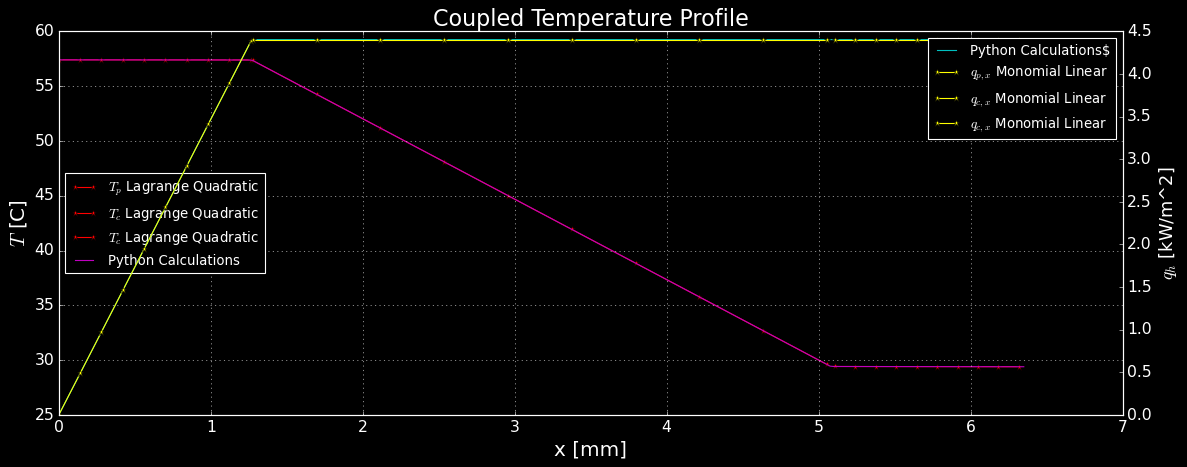

In [45]:
import pandas as pd

df1 = pd.read_csv('output_omega_1_0002.csv')
df2 = pd.read_csv('output_omega_2_0002.csv')
df3 = pd.read_csv('output_omega_3_0002.csv')
plot_solution(df1=df1, df2=df2, title='Coupled Temperature Profile',
              u1_legend=r'$T_p$ Lagrange Quadratic',
              u1_flux_legend=r'$q_{p,x}$ Monomial Linear',
              u2_legend=r'$T_c$ Lagrange Quadratic',
              u2_flux_legend=r'$q_{c,x}$ Monomial Linear',
              u3_legend=r'$T_p$ Lagrange Quadratic',
              u3_flux_legend=r'$q_{c,x}$ Monomial Linear',
              x_scale=1/unit.milli/unit.meter,
              xlabel='x [mm]', y1label=r'$T$ [C]', 
              y2_scale=1/unit.kilo, y2label=r'$q_h$ [kW/m^2]',
              df3=df3,
              femlb=femlb_2,
              c_vec=c_star_2)

In [46]:
df1

,heatFluxPlate_x,id,tempPlate,x,y,z
0,0.00,0.00,330.55,0.00,0,0
1,486.82,0.00,330.55,0.00,0,0
2,973.64,0.00,330.55,0.00,0,0
3,"1,460.46",0.00,330.55,0.00,0,0
4,"1,947.28",0.00,330.55,0.00,0,0
5,"2,434.10",0.00,330.55,0.00,0,0
6,"2,920.92",0.00,330.54,0.00,0,0
7,"3,407.75",0.00,330.54,0.00,0,0
8,"3,894.57",0.00,330.54,0.00,0,0
9,"4,381.39",0.00,330.54,0.00,0,0


In [47]:
df2

,heatFluxCoolant_x,id,tempCoolant,x,y,z
0,"4,403.40",0.00,330.49,0.00,0,0
1,"4,403.40",0.00,327.41,0.00,0,0
2,"4,403.40",0.00,324.33,0.00,0,0
3,"4,403.40",0.00,321.25,0.00,0,0
4,"4,403.40",0.00,318.17,0.00,0,0
5,"4,403.40",0.00,315.09,0.00,0,0
6,"4,403.40",0.00,312.01,0.00,0,0
7,"4,403.40",0.00,308.93,0.00,0,0
8,"4,403.40",0.00,305.84,0.00,0,0
9,"4,403.40",0.00,302.76,0.01,0,0


In [48]:
df3

,heatFluxRightPlate_x,id,tempRightPlate,x,y,z
0,"4,403.40",0.00,302.58,0.01,0,0
1,"4,403.40",0.00,302.57,0.01,0,0
2,"4,403.40",0.00,302.57,0.01,0,0
3,"4,403.40",0.00,302.57,0.01,0,0
4,"4,403.40",0.00,302.57,0.01,0,0
5,"4,403.40",0.00,302.56,0.01,0,0
6,"4,403.40",0.00,302.56,0.01,0,0
7,"4,403.40",0.00,302.56,0.01,0,0
8,"4,403.40",0.00,302.56,0.01,0,0
9,"4,403.40",0.00,302.55,0.01,0,0


#### [Moose Test 3](#toc)<a id="Moose3DomainNeumannNeumann"></a>
## 3 Domains with a heat sink in the coolant and neumann B/C's on both sides
### Note: All 3 domains initialized at 300 K

In [49]:
'''Parameters'''
n_felem_plate = 10
n_felem_coolant = 10
n_felem_plate_2 = 10

s_source_right_plate = 0.0*unit.watt/unit.inch**3
s_source_coolant = -s_source * (x_i_l-x_a) / (x_i_r - x_i_l)

In [50]:
'''FEM'''
n_plot_pts_plate = 10
n_plot_pts_coolant = 10
n_plot_pts_right_plate = 10

In [51]:
#Working write_input_file 
def write_input_file_3Domains_Neumann(pjfnk=False):
    import pyhit
    import moosetree
    root = pyhit.load('')
    
    prblm = root.insert(-1,'Problem')
    prblm['type'] = 'FEProblem'
    prblm['coord_type'] = 'XYZ'

    mesh = root.insert(-1,'Mesh')
    
    omega1 = mesh.insert(-1,'omega1')
    omega1['type'] = 'GeneratedMeshGenerator'
    omega1['dim'] = 1
    omega1['xmin'] = x_a
    omega1['xmax'] = x_i_l
    omega1['nx'] = n_felem_plate
    #omega1['boundary_name_prefix'] = "omega_1"
    if order == 'second':
        omega1['elem_type'] = 'edge3'
    
    omega2 = mesh.insert(-1,'omega2')
    omega2['type'] = 'GeneratedMeshGenerator'
    omega2['dim'] = 1
    omega2['xmin'] = x_i_l
    omega2['xmax'] = x_i_r
    omega2['nx'] = n_felem_coolant
    #omega2['boundary_name_prefix'] = "omega_2"
    if order == 'second':
        omega2['elem_type'] = 'edge3'
        
    omega3 = mesh.insert(-1,'omega3')
    omega3['type'] = 'GeneratedMeshGenerator'
    omega3['dim'] = 1
    omega3['xmin'] = x_i_r
    omega3['xmax'] = x_b
    omega3['nx'] = n_felem_plate_2
    #omega3['boundary_name_prefix'] = "omega_3"
    if order == 'second':
        omega3['elem_type'] = 'edge3'

    omega = mesh.insert(-1,'omega')
    omega['type'] = 'StitchedMeshGenerator'
    omega['inputs'] = "'omega1 omega2 omega3'"
    omega['stitch_boundaries_pairs'] = "'right left; right left'"
    omega['clear_stitched_boundary_ids'] = 'true'
    
    mod1 = mesh.insert(-1,'mod1')
    mod1['type'] = 'SubdomainBoundingBoxGenerator'
    mod1['input'] = 'omega'
    mod1['block_id'] = 1
    mod1['block_name'] = 'omega_1'
    mod1['bottom_left'] = str(x_a)+' 0 0'
    mod1['top_right'] = str(x_i_l)+' 1 0'
    
    mod2 = mesh.insert(-1,'mod2')
    mod2['type'] = 'SubdomainBoundingBoxGenerator'
    mod2['input'] = 'mod1'
    mod2['block_id'] = 2
    mod2['block_name'] = 'omega_2'
    mod2['bottom_left'] = str(x_i_l)+' 0 0'
    mod2['top_right'] = str(x_i_r)+' 1 0'
    
    mod3 = mesh.insert(-1,'mod3')
    mod3['type'] = 'SubdomainBoundingBoxGenerator'
    mod3['input'] = 'mod2'
    mod3['block_id'] = 3
    mod3['block_name'] = 'omega_3'
    mod3['bottom_left'] = str(x_i_r)+' 0 0'
    mod3['top_right'] = str(x_b)+' 1 0'
    
    mod4 = mesh.insert(-1,'mod4')
    mod4['type'] = 'SideSetsBetweenSubdomainsGenerator'
    mod4['input'] = 'mod3'
    mod4['primary_block'] = 'omega_1'
    mod4['paired_block'] = 'omega_2' 
    mod4['new_boundary'] = 'interface_12'
    
    mod5 = mesh.insert(-1,'mod5')
    mod5['type'] = 'SideSetsBetweenSubdomainsGenerator'
    mod5['input'] = 'mod4'
    mod5['primary_block'] = 'omega_2'
    mod5['paired_block'] = 'omega_3' 
    mod5['new_boundary'] = 'interface_23'
    
    mod6 = mesh.insert(-1,'mod6')
    mod6['type'] = 'SideSetsAroundSubdomainGenerator'
    mod6['input'] = 'mod5'
    mod6['block'] = 'omega_1'
    mod6['normal'] = '-1 0 0'
    mod6['new_boundary'] = 'left'
    
    mod7 = mesh.insert(-1,'mod7')
    mod7['type'] = 'SideSetsAroundSubdomainGenerator'
    mod7['input'] = 'mod6'
    mod7['block'] = 'omega_3'
    mod7['normal'] = '1 0 0'
    mod7['new_boundary'] = 'right'

    vars = root.insert(-1,'Variables')
    
    temp_cool = vars.insert(-1,'tempPlate')
    temp_cool['block'] = 'omega_1'
    temp_cool['order'] = order
    temp_cool['family'] = 'lagrange'
    temp_cool['initial_condition'] = 300
    
    temp_fuel = vars.insert(-1,'tempCoolant')
    temp_fuel['block'] = 'omega_2'
    temp_fuel['order'] = order
    temp_fuel['family'] = 'lagrange'
    temp_fuel['initial_condition'] = 300
    
    temp_right_plate = vars.insert(-1,'tempRightPlate')
    temp_right_plate['block'] = 'omega_3'
    temp_right_plate['order'] = order
    temp_right_plate['family'] = 'lagrange'
    temp_right_plate['initial_condition'] = 300
    
    aux_vars = root.insert(-1,'AuxVariables')
    
    heat_flux_cool = aux_vars.insert(-1,'heatFluxPlate')
    heat_flux_cool['block'] = 'omega_1'
    heat_flux_cool['order'] = flux_order
    heat_flux_cool['family'] = 'monomial_vec'
    
    heat_flux_cool_r = aux_vars.insert(-1,'heatFluxPlate_x')
    heat_flux_cool_r['block'] = 'omega_1'
    heat_flux_cool_r['order'] = flux_order
    heat_flux_cool_r['family'] = 'monomial'
    
    heat_flux_fuel = aux_vars.insert(-1,'heatFluxCoolant')
    heat_flux_fuel['block'] = 'omega_2'
    heat_flux_fuel['order'] = flux_order
    heat_flux_fuel['family'] = 'monomial_vec'
    
    heat_flux_fuel_r = aux_vars.insert(-1,'heatFluxCoolant_x')
    heat_flux_fuel_r['block'] = 'omega_2'
    heat_flux_fuel_r['order'] = flux_order
    heat_flux_fuel_r['family'] = 'monomial'
    
    heat_flux_right_plate = aux_vars.insert(-1,'heatFluxRightPlate')
    heat_flux_right_plate['block'] = 'omega_3'
    heat_flux_right_plate['order'] = flux_order
    heat_flux_right_plate['family'] = 'monomial_vec'
    
    heat_flux_right_plate_r = aux_vars.insert(-1,'heatFluxRightPlate_x')
    heat_flux_right_plate_r['block'] = 'omega_3'
    heat_flux_right_plate_r['order'] = flux_order
    heat_flux_right_plate_r['family'] = 'monomial'

    kernels = root.insert(-1,'Kernels')
    
    conduction = kernels.insert(-1,'heat-conduction-plate')
    conduction['type'] = 'HeatConduction'
    conduction['block'] = 'omega_1'
    conduction['variable'] = 'tempPlate'
    conduction['thermCond'] = k_plate
    
    source = kernels.insert(-1,'heat-source-plate')
    source['type'] = 'HeatSource'
    source['block'] = 'omega_1'
    source['variable'] = 'tempPlate'
    source['sourceS'] = s_source
    
    conduction = kernels.insert(-1,'heat-conduction-coolant')
    conduction['type'] = 'HeatConduction'
    conduction['block'] = 'omega_2'
    conduction['variable'] = 'tempCoolant'
    conduction['thermCond'] = k_coolant
    
    convection = kernels.insert(-1,'heat-convection-coolant')
    convection['type'] = 'HeatConvection'
    convection['block'] = 'omega_2'
    convection['variable'] = 'tempCoolant'
    convection['massDensity'] = rho_coolant
    convection['heatCapacity'] = cp_coolant
    convection['velocity'] = str(velocity[0])+' '+str(velocity[1])+' '+str(velocity[2])
    
    source = kernels.insert(-1,'heat-source-coolant')
    source['type'] = 'HeatSource'
    source['block'] = 'omega_2'
    source['variable'] = 'tempCoolant'
    source['sourceS'] = s_source_coolant
    
    conduction = kernels.insert(-1,'heat-conduction-right-plate')
    conduction['type'] = 'HeatConduction'
    conduction['block'] = 'omega_3'
    conduction['variable'] = 'tempRightPlate'
    conduction['thermCond'] = k_plate
    
    #Used if there is a heater in the next plate
    """source = kernels.insert(-1,'heat-source-right-plate')
    source['type'] = 'HeatSource'
    source['block'] = 'omega_3'
    source['variable'] = 'tempRightPlate'
    source['sourceS'] = s_source_right_plate"""
    
    interf_kernels = root.insert(-1,'InterfaceKernels')
    
    n_flux = interf_kernels.insert(-1,'normal-heat-flux-continuity-12')
    n_flux['type'] = 'InterfaceNormalFluxContinuity'
    n_flux['variable'] = 'tempPlate'
    n_flux['neighbor_var'] = 'tempCoolant'
    n_flux['boundary'] = 'interface_12'
    n_flux['thermCond'] = k_plate
    n_flux['thermCondNeighbor'] = k_coolant
    
    t_jump = interf_kernels.insert(-1,'temperature-jump-12')
    t_jump['type'] = 'InterfaceJump'
    t_jump['variable'] = 'tempPlate'
    t_jump['neighbor_var'] = 'tempCoolant'
    t_jump['boundary'] = 'interface_12'
    t_jump['transferCoeff'] = interfacial_heat_transfer_coeff
    t_jump['adsorptionCoeff'] = interfacial_adsorption_coeff
    t_jump['thermCondCoeff'] = k_plate
    
    n_flux = interf_kernels.insert(-1,'normal-heat-flux-continuity-23')
    n_flux['type'] = 'InterfaceNormalFluxContinuity'
    n_flux['variable'] = 'tempCoolant'
    n_flux['neighbor_var'] = 'tempRightPlate'
    n_flux['boundary'] = 'interface_23'
    n_flux['thermCond'] = k_coolant
    n_flux['thermCondNeighbor'] = k_plate
    
    t_jump = interf_kernels.insert(-1,'temperature-jump-23')
    t_jump['type'] = 'InterfaceJump'
    t_jump['variable'] = 'tempCoolant'
    t_jump['neighbor_var'] = 'tempRightPlate'
    t_jump['boundary'] = 'interface_23'
    t_jump['transferCoeff'] = interfacial_heat_transfer_coeff
    t_jump['adsorptionCoeff'] = interfacial_adsorption_coeff
    t_jump['thermCondCoeff'] = k_coolant
    
    aux_kernels = root.insert(-1,'AuxKernels')
    
    heat_flux = aux_kernels.insert(-1,'heat-flux-plate')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['block'] = 'omega_1'
    heat_flux['field'] = 'tempPlate'
    heat_flux['thCondCoeff'] = k_plate
    heat_flux['variable'] = 'heatFluxPlate'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-plate-x')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['block'] = 'omega_1'
    heat_flux_r['vector_variable'] = 'heatFluxPlate'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxPlate_x'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    heat_flux = aux_kernels.insert(-1,'heat-flux-coolant')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['block'] = 'omega_2'
    heat_flux['field'] = 'tempCoolant'
    heat_flux['thCondCoeff'] = k_coolant
    heat_flux['variable'] = 'heatFluxCoolant'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-coolant-x')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['block'] = 'omega_2'
    heat_flux_r['vector_variable'] = 'heatFluxCoolant'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxCoolant_x'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    heat_flux = aux_kernels.insert(-1,'heat-flux-right-plate')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['block'] = 'omega_3'
    heat_flux['field'] = 'tempRightPlate'
    heat_flux['thCondCoeff'] = k_plate
    heat_flux['variable'] = 'heatFluxRightPlate'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-right-plate-x')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['block'] = 'omega_3'
    heat_flux_r['vector_variable'] = 'heatFluxRightPlate'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxRightPlate_x'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    bcs = root.insert(-1,'BCs')
    
    cl = bcs.insert(-1,'center-line')
    cl['type'] = 'NeumannBC'
    cl['variable'] = 'tempPlate'
    cl['boundary'] = 'left'
    cl['value'] = 0 
    
    #Old boundary condition at x=0.20 in (inteface b/w coolant channel and right plate)
    """ro = bcs.insert(-1,'x_i_r')
    ro['type'] = 'NormalHeatFluxBC'
    ro['variable'] = 'tempCoolant'
    ro['boundary'] = 'omega_2_right'
    ro['refTempFunc'] = 'refTempFunc'
    ro['transferCoeff'] = heat_transfer_coeff"""
    
    """#Robin boundary condition
    ro = bcs.insert(-1,'x_b')
    ro['type'] = 'NormalHeatFluxBC'
    ro['variable'] = 'tempRightPlate'
    ro['boundary'] = 'right'
    ro['refTempFunc'] = 'refTempFunc'
    ro['transferCoeff'] = heat_transfer_coeff"""
    
    #Neumann boundary condition
    ro = bcs.insert(-1,'x_b')
    ro['type'] = 'NeumannBC'
    ro['variable'] = 'tempRightPlate'
    ro['boundary'] = 'right'
    ro['value'] = 0
    
    functions = root.insert(-1,'Functions')
    
    ref_temp_func = functions.insert(-1, 'refTempFunc')
    ref_temp_func['type'] = 'ParsedFunction'
    ref_temp_func['value'] = 'temp_ref'
    ref_temp_func['vars'] = 'temp_ref'
    ref_temp_func['vals'] = str(temp_ref)
    
    if pjfnk:
        exe = root.insert(-1,'Executioner')
        exe['type'] = 'Steady'
        exe['solve_type']  = 'PJFNK'
        exe['petsc_options_iname']  = '-pc_type -pc_hypre_type'
        exe['petsc_options_value']  = 'hypre boomeramg'
        exe['l_max_its']  = 20
        exe['l_tol']  = 1e-5
        exe['nl_max_its']  = 15
        exe['nl_rel_tol']  = 1e-8
        exe['nl_abs_tol']  = 1e-8
    elif fdp_full:
        pre = root.insert(-1, 'Preconditioning')
        pre['active'] = 'fdp-newt-full'
        
        fdp = pre.insert(-1, 'fdp-newt-full')
        fdp['type'] = 'FDP'
        fdp['full'] = 'true'
        fdp['solve_type'] = 'NEWTON'
        fdp['petsc_options_iname'] = ""'-pc_type -mat_fd_coloring_err -mat_fd_type'""
        fdp['petsc_options_value'] = ""'lu  1e-8          ds'""
        
        exe = root.insert(-1,'Executioner')
        exe['type'] = 'Steady'
        

    vp = root.insert(-1,'VectorPostprocessors')
    
    omega_1 = vp.insert(-1,'omega_1')
    omega_1['type'] = 'LineValueSampler'
    omega_1['execute_on'] = 'timestep_end final'
    omega_1['variable'] = 'tempPlate heatFluxPlate_x'  
    omega_1['start_point'] = str(x_a)+' 0 0'
    omega_1['end_point'] = str(x_i_l*0.995)+' 0 0'
    omega_1['num_points'] = n_plot_pts_plate
    omega_1['sort_by'] = 'id'
    
    omega_2 = vp.insert(-1,'omega_2')
    omega_2['type'] = 'LineValueSampler'
    omega_2['execute_on'] = 'timestep_end final'
    omega_2['variable'] = 'tempCoolant heatFluxCoolant_x'  
    omega_2['start_point'] = str(x_i_l*1.005)+' 0 0'
    omega_2['end_point'] = str(x_i_r*0.995)+' 0 0'
    omega_2['num_points'] = n_plot_pts_coolant
    omega_2['sort_by'] = 'id'  

    omega_3 = vp.insert(-1,'omega_3')
    omega_3['type'] = 'LineValueSampler'
    omega_3['execute_on'] = 'timestep_end final'
    omega_3['variable'] = 'tempRightPlate heatFluxRightPlate_x'  
    omega_3['start_point'] = str(x_i_r*1.005)+' 0 0'
    omega_3['end_point'] = str(x_b*0.995)+' 0 0'
    omega_3['num_points'] = n_plot_pts_right_plate
    omega_3['sort_by'] = 'id'
    
    out = root.insert(-1,'Outputs')
    out['console'] = 'true'
    csv = out.insert(-1,'csv')
    csv['type'] = 'CSV'
    csv['file_base'] = 'output'
    csv['execute_on'] = 'final'
    
    debug = root.insert(-1,'Debug')
    debug['show_var_residual_norms'] = 'true'

    pyhit.write('input_3Domains_Neumann.hit', root)

In [52]:
'''Input file'''
write_input_file_3Domains_Neumann()
!cat input_3Domains_Neumann.hit

[Problem]
  type = FEProblem
  coord_type = XYZ
[]
[Mesh]
  [omega1]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.0
    xmax = 0.00127
    nx = 10
    elem_type = edge3
  []
  [omega2]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.00127
    xmax = 0.00508
    nx = 10
    elem_type = edge3
  []
  [omega3]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.00508
    xmax = 0.00635
    nx = 10
    elem_type = edge3
  []
  [omega]
    type = StitchedMeshGenerator
    inputs = 'omega1 omega2 omega3'
    stitch_boundaries_pairs = 'right left; right left'
    clear_stitched_boundary_ids = true
  []
  [mod1]
    type = SubdomainBoundingBoxGenerator
    input = omega
    block_id = 1
    block_name = omega_1
    bottom_left = '0.0 0 0'
    top_right = '0.00127 1 0'
  []
  [mod2]
    type = SubdomainBoundingBoxGenerator
    input = mod1
    block_id = 2
    block_name = omega_2
    bottom_left = '0.00127 0 0'
    top_right = '0.00508 1 0'
  []
  [mod3]
    type

In [53]:
'''Delete any previous *.csv files'''
!rm output_omega_*.csv

In [54]:
'''Run MOOSE App'''
!./heated_plate-opt -i input_3Domains_Neumann.hit


In ReplicatedMesh::stitch_meshes:
This mesh has 1 nodes on boundary 1.
Other mesh has 1 nodes on boundary 0.
Minimum edge length on both surfaces is 0.000127.
In ReplicatedMesh::stitch_meshes:
Found 1 matching nodes.

In ReplicatedMesh::stitch_meshes:
This mesh has 1 nodes on boundary 1.
Other mesh has 1 nodes on boundary 0.
Minimum edge length on both surfaces is 0.000127.
In ReplicatedMesh::stitch_meshes:
Found 1 matching nodes.

Framework Information:
MOOSE Version:           git commit b98ea2c450 on 2021-09-23
LibMesh Version:         
PETSc Version:           3.15.1
SLEPc Version:           3.15.1
Current Time:            Sun Dec 19 04:37:39 2021
Executable Timestamp:    Sun Dec 19 01:33:32 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   61
  Elems:                   30
  Num Subdomains:          3

Nonlinear System:
  Num

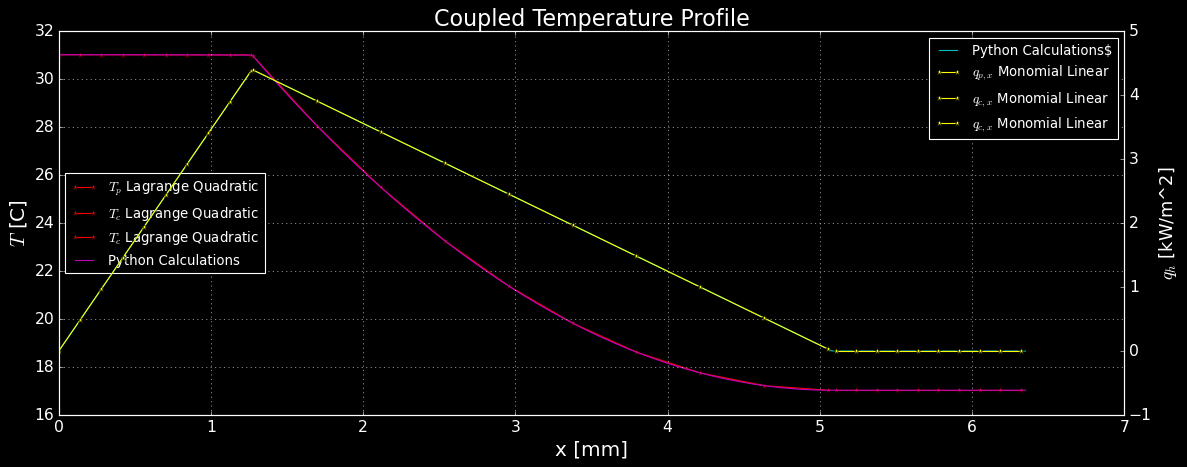

In [55]:
import pandas as pd

df1 = pd.read_csv('output_omega_1_0002.csv')
df2 = pd.read_csv('output_omega_2_0002.csv')
df3 = pd.read_csv('output_omega_3_0002.csv')
plot_solution(df1=df1, df2=df2, title='Coupled Temperature Profile',
              u1_legend=r'$T_p$ Lagrange Quadratic',
              u1_flux_legend=r'$q_{p,x}$ Monomial Linear',
              u2_legend=r'$T_c$ Lagrange Quadratic',
              u2_flux_legend=r'$q_{c,x}$ Monomial Linear',
              u3_legend=r'$T_p$ Lagrange Quadratic',
              u3_flux_legend=r'$q_{c,x}$ Monomial Linear',
              x_scale=1/unit.milli/unit.meter,
              xlabel='x [mm]', y1label=r'$T$ [C]', 
              y2_scale=1/unit.kilo, y2label=r'$q_h$ [kW/m^2]',
              df3=df3,
              femlb=femlb_3,
              c_vec=c_star_3,
              scale_temp=True)

In [56]:
df1

,heatFluxPlate_x,id,tempPlate,x,y,z
0,0.00,0.00,304.17,0.00,0,0
1,486.82,0.00,304.17,0.00,0,0
2,973.64,0.00,304.17,0.00,0,0
3,"1,460.46",0.00,304.17,0.00,0,0
4,"1,947.28",0.00,304.17,0.00,0,0
5,"2,434.10",0.00,304.17,0.00,0,0
6,"2,920.92",0.00,304.17,0.00,0,0
7,"3,407.75",0.00,304.17,0.00,0,0
8,"3,894.57",0.00,304.17,0.00,0,0
9,"4,381.39",0.00,304.16,0.00,0,0


In [57]:
df2

,heatFluxCoolant_x,id,tempCoolant,x,y,z
0,"4,396.06",0.00,304.12,0.00,0,0
1,"3,910.87",0.00,301.21,0.00,0,0
2,"3,425.69",0.00,298.64,0.00,0,0
3,"2,940.50",0.00,296.42,0.00,0,0
4,"2,455.31",0.00,294.53,0.00,0,0
5,"1,970.12",0.00,292.98,0.00,0,0
6,"1,484.93",0.00,291.77,0.00,0,0
7,999.74,0.00,290.90,0.00,0,0
8,514.55,0.00,290.37,0.00,0,0
9,29.36,0.00,290.18,0.01,0,0


In [58]:
df3

,heatFluxRightPlate_x,id,tempRightPlate,x,y,z
0,0.00,0.00,290.18,0.01,0,0
1,0.00,0.00,290.18,0.01,0,0
2,0.00,0.00,290.18,0.01,0,0
3,0.00,0.00,290.18,0.01,0,0
4,-0.00,0.00,290.18,0.01,0,0
5,0.00,0.00,290.18,0.01,0,0
6,0.00,0.00,290.18,0.01,0,0
7,0.00,0.00,290.18,0.01,0,0
8,0.00,0.00,290.18,0.01,0,0
9,0.00,0.00,290.18,0.01,0,0


In [59]:
'''Parameters'''

'Parameters'

In [60]:
'''Input file mod'''

'Input file mod'

In [61]:
'''Run MOOSE App'''

'Run MOOSE App'

In [62]:
'''Solution'''

'Solution'

## [2-D Results and Analysis](#toc)<a id="ranalysis"></a>

In [63]:
'''Parameters'''

'Parameters'

In [64]:
'''FEM Parameters'''

'FEM Parameters'

In [65]:
'''Input file mod'''

'Input file mod'

In [66]:
'''Run MOOSE App'''

'Run MOOSE App'

In [67]:
'''Show 2D solution'''

'Show 2D solution'

## [Conclusions](#toc)<a id="conclusions"></a>

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [4] author, [reference]()